# Moa Prediction: Data understanding and visualization


**Info about the data files**

* **train_features.csv** - Features for the training set. Features g- signify gene expression data, and c- signify cell viability data. cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle); control perturbations have no MoAs; cp_time and cp_dose indicate treatment duration (24, 48, 72 hours) and dose (high or low).
* **train_targets_scored.csv** - The binary MoA targets that are scored.
* **train_targets_nonscored.csv** - Additional (optional) binary MoA responses for the training data. These are not predicted nor scored.
* **test_features.csv** - Features for the test data. You must predict the probability of each scored MoA for each row in the test data.


**Reference**

- [sklearn tutorial on MultiOutputClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

data_dir = './datasets/'

In [2]:
dff_orig = pd.read_csv(data_dir+'train_features.csv')
dft_orig = pd.read_csv(data_dir+'train_targets_scored.csv')

In [3]:
print (dff_orig.shape)
dff_orig.head(2)

(23814, 876)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371


In [4]:
g_col = [f for f in dff_orig.columns.values if f[0]=='g']
print ( f"Total number of gene expression data features: {len(g_col)}" )
c_col = [f for f in dff_orig.columns.values if (f[0]=='c' and f[1]=='-')]
print ( f"Total number of cell viability data features: {len(c_col)}" )
rest_col = [f for f in dff_orig.columns.values if (f[1]!='-')]
print ( f"Rest of the features: {rest_col}" )

Total number of gene expression data features: 772
Total number of cell viability data features: 100
Rest of the features: ['sig_id', 'cp_type', 'cp_time', 'cp_dose']


In [5]:
print ("cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle)")
print (dff_orig['cp_type'].unique())

cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle)
['trt_cp' 'ctl_vehicle']


In [6]:
print ("cp_time and cp_dose indicate treatment duration (24, 48, 72 hours) and dose (high or low).")
print (f"cp_time unique vals: {dff_orig['cp_time'].unique()}")
print (f"cp_dose unique vals: {dff_orig['cp_dose'].unique()}")

cp_time and cp_dose indicate treatment duration (24, 48, 72 hours) and dose (high or low).
cp_time unique vals: [24 72 48]
cp_dose unique vals: ['D1' 'D2']


In [7]:
dff_orig.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


### targets

In [8]:
print (dft_orig.shape)
dft_orig.head(2)

(23814, 207)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dft_orig.describe()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.000714,0.000756,0.001008,0.007979,0.012640,0.003065,0.002268,0.004031,0.000504,0.011338,...,0.000252,0.001050,0.002016,0.013270,0.003065,0.000252,0.007139,0.001092,0.001638,0.001260
std,0.026709,0.027483,0.031731,0.088967,0.111716,0.055283,0.047566,0.063365,0.022443,0.105876,...,0.015871,0.032384,0.044851,0.114429,0.055283,0.015871,0.084190,0.033025,0.040436,0.035472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dft_orig.describe().loc['max'].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

## Few Ideas

* First take all the features as X values and take one of the targets as Y and use some classifier.
* Then we can use multilabel classifier by inclusing mode targets at the same time.
* 

### Preprocessing the data

In [11]:
# drop the columns with non-numeric values.
dff = dff_orig.drop(['sig_id', 'cp_type', 'cp_dose'], axis=1)
dft = dft_orig.drop('sig_id', axis=1)
print ( dff.shape )
print ( dft.shape )

(23814, 873)
(23814, 206)


In [12]:
print (len(dft))
print ( dft.sum() )

23814
5-alpha_reductase_inhibitor               17
11-beta-hsd1_inhibitor                    18
acat_inhibitor                            24
acetylcholine_receptor_agonist           190
acetylcholine_receptor_antagonist        301
                                        ... 
ubiquitin_specific_protease_inhibitor      6
vegfr_inhibitor                          170
vitamin_b                                 26
vitamin_d_receptor_agonist                39
wnt_inhibitor                             30
Length: 206, dtype: int64


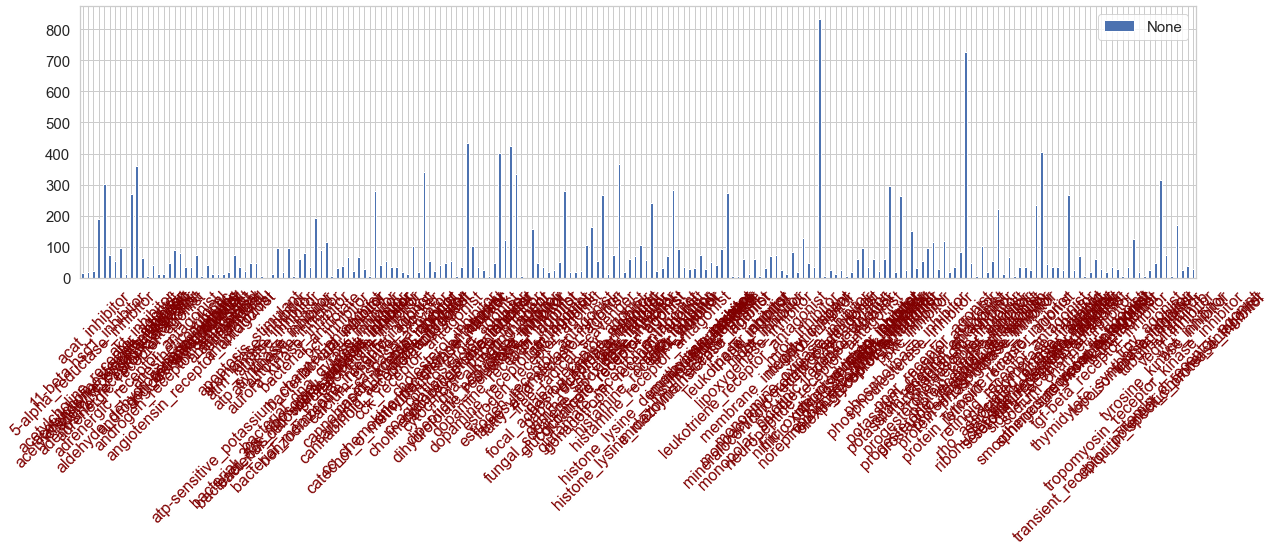

In [13]:
dft.sum().plot.bar(y=dft.columns,rot=0, figsize=(20,5))#, color=['blue', 'orange'])
plt.xticks(fontsize=16, rotation=45, color='maroon');
plt.yticks(fontsize=15);
plt.legend(fontsize=15);

### Model 

In [14]:
import time

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_multilabel_classification
from xgboost import XGBClassifier


In [15]:
def prepare_data(df_feature, df_target, Ncol_x=100, Ncol_y=2, Nrows=None):
    if Nrows:
        X = df_feature.values[:Nrows, :Ncol_x]
        y = df_target[df_target.columns[:Ncol_y]].values[:Nrows, :]
    else:
        X = df_feature.values[:, :Ncol_x]
        y = df_target[df_target.columns[:Ncol_y]].values
    (X_train, X_val, y_train, y_val) = train_test_split(X, y, test_size=0.2)
    
    print (f"X_train.shape {X_train.shape}")
    print (f"y_train.shape {y_train.shape}")
    print (f"X_val.shape {X_val.shape}")
    print (f"y_val.shape {y_val.shape}")

    
    return (X_train, X_val, y_train, y_val)

(X_train, X_val, y_train, y_val) = prepare_data(dff, dft, Ncol_x=100, Ncol_y=2, Nrows=20000)

#print (f"X_train.shape {X_train.shape} train_test_split: {X_train.shape[0]}-{X_val.shape[0]}")
#print (f"y_train.shape {y_train.shape}")

X_train.shape (16000, 100)
y_train.shape (16000, 2)
X_val.shape (4000, 100)
y_val.shape (4000, 2)


In [16]:
def Model(clf_name, dff=dff, dft=dft, Ncol_x=100, Ncol_y=2, Nrows=None):
    
    clf_dict = {"LR": LogisticRegression(max_iter=1000), 
                "KNN": KNeighborsClassifier(n_neighbors=2),
                "XGB" : XGBClassifier(),
                "ADB": AdaBoostClassifier(n_estimators = 100)}
    
    t0 = time.time()

    clf = clf_dict[clf_name]
    
    #(X_train, X_val, y_train, y_val) = prepare_data(dff, dft, Ntargets=Ntargets, Nrows=None)
    (X_train, X_val, y_train, y_val) = prepare_data(dff, dft, Ncol_x=Ncol_x, Ncol_y=Ncol_y, Nrows=Nrows)

    model = MultiOutputClassifier(clf) 
    model.fit(X_train, y_train)
    
    acc_train = np.round( 100*accuracy_score(y_train, model.predict(X_train)), 2)
    acc_val = np.round( 100*accuracy_score(y_val, model.predict(X_val) ), 2)
    
    ll_train = log_loss(y_train, model.predict(X_train))
    ll_val   = log_loss(y_val, model.predict(X_val) )
    
    t1 = time.time()
    
    return (acc_train, acc_val, ll_train, ll_val, t1-t0)

**All the rows and only 3 columns in the target**

In [20]:
results = []

for clf in ["LR", "XGB", "ADB" ]:
    print (clf)
    (acc_train, acc_val, ll_train, ll_val, dt)= Model(clf, dff=dff, dft=dft, Ncol_y=3, Nrows=10000)
    results.append([clf, acc_train, acc_val, ll_train, ll_val, dt] )

res_df = pd.DataFrame(results, columns=["classifier", "accuracy train (%)", "accuracy valid (%)",
                                        "Log-Loss train", "Log-Loss valid",  "Run Time"])
res_df.set_index("classifier", inplace=True)
res_df
    

LR
X_train.shape (8000, 100)
y_train.shape (8000, 3)
X_val.shape (2000, 100)
y_val.shape (2000, 3)
XGB
X_train.shape (8000, 100)
y_train.shape (8000, 3)
X_val.shape (2000, 100)
y_val.shape (2000, 3)
ADB
X_train.shape (8000, 100)
y_train.shape (8000, 3)
X_val.shape (2000, 100)
y_val.shape (2000, 3)


,accuracy train (%),accuracy valid (%),Log-Loss train,Log-Loss valid,Run Time
classifier,,,,,
LR,99.84,99.85,1.785245e-03,0.001648,0.969889
XGB,99.98,99.70,2.746531e-04,0.003296,3.163452
ADB,100.00,99.85,4.218847e-18,0.001648,27.569659


In [21]:
results = []

for clf in ["LR", "XGB", "ADB" ]:
    print (clf)
    (acc_train, acc_val, ll_train, ll_val, dt)= Model(clf, dff=dff, dft=dft, Ncol_y=3)
    results.append([clf, acc_train, acc_val, ll_train, ll_val, dt] )

res_df = pd.DataFrame(results, columns=["classifier", "accuracy train (%)", "accuracy valid (%)",
                                        "Log-Loss train", "Log-Loss valid",  "Run Time"])
res_df.set_index("classifier", inplace=True)
res_df
    

LR
X_train.shape (19051, 100)
y_train.shape (19051, 3)
X_val.shape (4763, 100)
y_val.shape (4763, 3)
XGB
X_train.shape (19051, 100)
y_train.shape (19051, 3)
X_val.shape (4763, 100)
y_val.shape (4763, 3)
ADB
X_train.shape (19051, 100)
y_train.shape (19051, 3)
X_val.shape (4763, 100)
y_val.shape (4763, 3)


,accuracy train (%),accuracy valid (%),Log-Loss train,Log-Loss valid,Run Time
classifier,,,,,
LR,99.75,99.77,2.768012e-03,0.002537,1.652130
XGB,100.00,99.83,5.646980e-18,0.001845,14.404470
ADB,100.00,99.79,5.646980e-18,0.001845,73.677128


**All the rows and only few columns in the Feature data**

In [17]:
results = []

clf = "LR"
#for clf in ["LR", "XGB", "ADB" ]:
for nx in [20, 50]:
    print (clf, nx)
    (acc_train, acc_val, ll_train, ll_val, dt)= Model(clf, dff=dff, dft=dft, Ncol_x=nx, Ncol_y=50)
    results.append([nx, acc_train, acc_val, ll_train, ll_val, dt] )

res_df = pd.DataFrame(results, columns=["Nfeature", "accuracy train (%)", "accuracy valid (%)",
                                        "Log-Loss train", "Log-Loss valid",  "Run Time"])
res_df.set_index("Nfeature", inplace=True)
res_df
    

LR 20
X_train.shape (19051, 20)
y_train.shape (19051, 50)
X_val.shape (4763, 20)
y_val.shape (4763, 50)
LR 50
X_train.shape (19051, 50)
y_train.shape (19051, 50)
X_val.shape (4763, 50)
y_val.shape (4763, 50)


,accuracy train (%),accuracy valid (%),Log-Loss train,Log-Loss valid,Run Time
Nfeature,,,,,
20,86.84,86.27,0.522978,0.541260,8.124262
50,86.87,86.65,0.524383,0.525514,14.158056


In [23]:
results = []

clf = "LR"
#for clf in ["LR", "XGB", "ADB" ]:
for nx in [100, 120]:
    print (clf, nx)
    (acc_train, acc_val, ll_train, ll_val, dt)= Model(clf, dff=dff, dft=dft, Ncol_x=nx, Ncol_y=50)
    results.append([nx, acc_train, acc_val, ll_train, ll_val, dt] )

res_df = pd.DataFrame(results, columns=["Nfeature", "accuracy train (%)", "accuracy valid (%)",
                                        "Log-Loss train", "Log-Loss valid",  "Run Time"])
res_df.set_index("Nfeature", inplace=True)
res_df
    

LR 100
X_train.shape (19051, 100)
y_train.shape (19051, 50)
X_val.shape (4763, 100)
y_val.shape (4763, 50)
LR 120
X_train.shape (19051, 120)
y_train.shape (19051, 50)
X_val.shape (4763, 120)
y_val.shape (4763, 50)


,accuracy train (%),accuracy valid (%),Log-Loss train,Log-Loss valid,Run Time
Nfeature,,,,,
100,87.44,85.81,0.509533,0.545227,23.440263
120,87.45,86.12,0.508674,0.543022,27.990912


In [18]:
results = []

clf = "LR"
for nx in [200, 300]:
    print (clf, nx)
    (acc_train, acc_val, ll_train, ll_val, dt)= Model(clf, dff=dff, dft=dft, Ncol_x=nx, Ncol_y=60)
    results.append([nx, acc_train, acc_val, ll_train, ll_val, dt] )

res_df = pd.DataFrame(results, columns=["Nfeature", "accuracy train (%)", "accuracy valid (%)",
                                        "Log-Loss train", "Log-Loss valid",  "Run Time"])
res_df.set_index("Nfeature", inplace=True)
res_df

LR 200
X_train.shape (19051, 200)
y_train.shape (19051, 60)
X_val.shape (4763, 200)
y_val.shape (4763, 60)
LR 300
X_train.shape (19051, 300)
y_train.shape (19051, 60)
X_val.shape (4763, 300)
y_val.shape (4763, 60)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [19]:
results = []

clf = "LR"
for nx in [200, 300]:
    print (clf, nx)
    (acc_train, acc_val, ll_train, ll_val, dt)= Model(clf, dff=dff, dft=dft, Ncol_x=nx, Ncol_y=50)
    results.append([nx, acc_train, acc_val, ll_train, ll_val, dt] )

res_df = pd.DataFrame(results, columns=["Nfeature", "accuracy train (%)", "accuracy valid (%)",
                                        "Log-Loss train", "Log-Loss valid",  "Run Time"])
res_df.set_index("Nfeature", inplace=True)
res_df
    

LR 200
X_train.shape (19051, 200)
y_train.shape (19051, 50)
X_val.shape (4763, 200)
y_val.shape (4763, 50)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0